# Coding Exercises (Part 12)

## Complete Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

132. Import and inspect the cars dataset (cars.csv)!

133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

134. __Transform__ the __mpg__ column in way that the ralationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

135. Create a __new column__ with the __manufacturer__ name!

136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
cars= pd.read_csv('cars.csv')

In [74]:
cars.model_year= cars.model_year.add(1900)

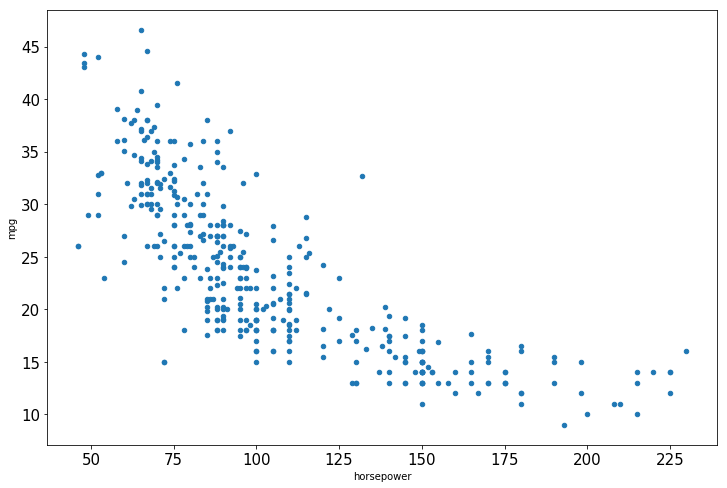

In [57]:
cars.plot(kind='scatter',x='horsepower',y ='mpg',
          figsize=(12,8),fontsize=15)#scatter requires x and y.

In [58]:
cars['gpm']= (1/cars.mpg*100).round(2)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,5.56
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.67
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,5.56
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.25
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,5.88
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,6.67
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,7.14
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,7.14
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,7.14
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,6.67


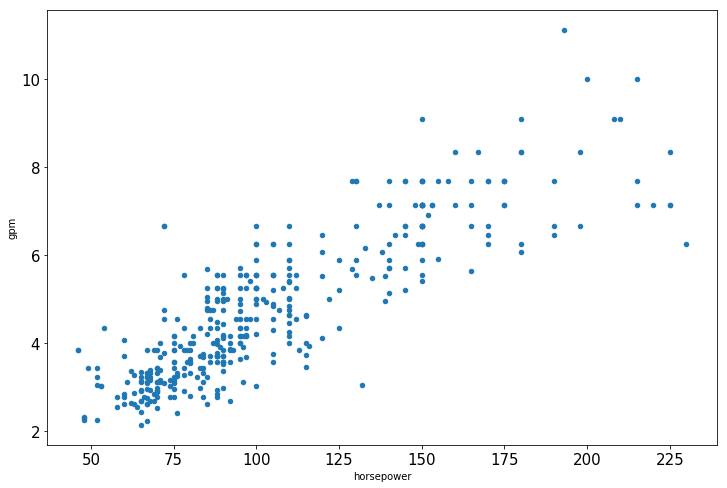

In [59]:
cars.plot(kind='scatter',x='horsepower',y ='gpm',
          figsize=(12,8),fontsize=15)

In [60]:
cars['manufacturer']= cars.name.str.split(' ',n=1,expand=True)[0]
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,5.56,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.67,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,5.56,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.25,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,5.88,ford
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,6.67,ford
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,7.14,chevrolet
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,7.14,plymouth
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,7.14,pontiac
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,6.67,amc


In [61]:
cars['continent']= cars.origin.map({'usa':'north america','europe':'europe','japan':'asia'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017678DDAE10>,
      dtype=object)

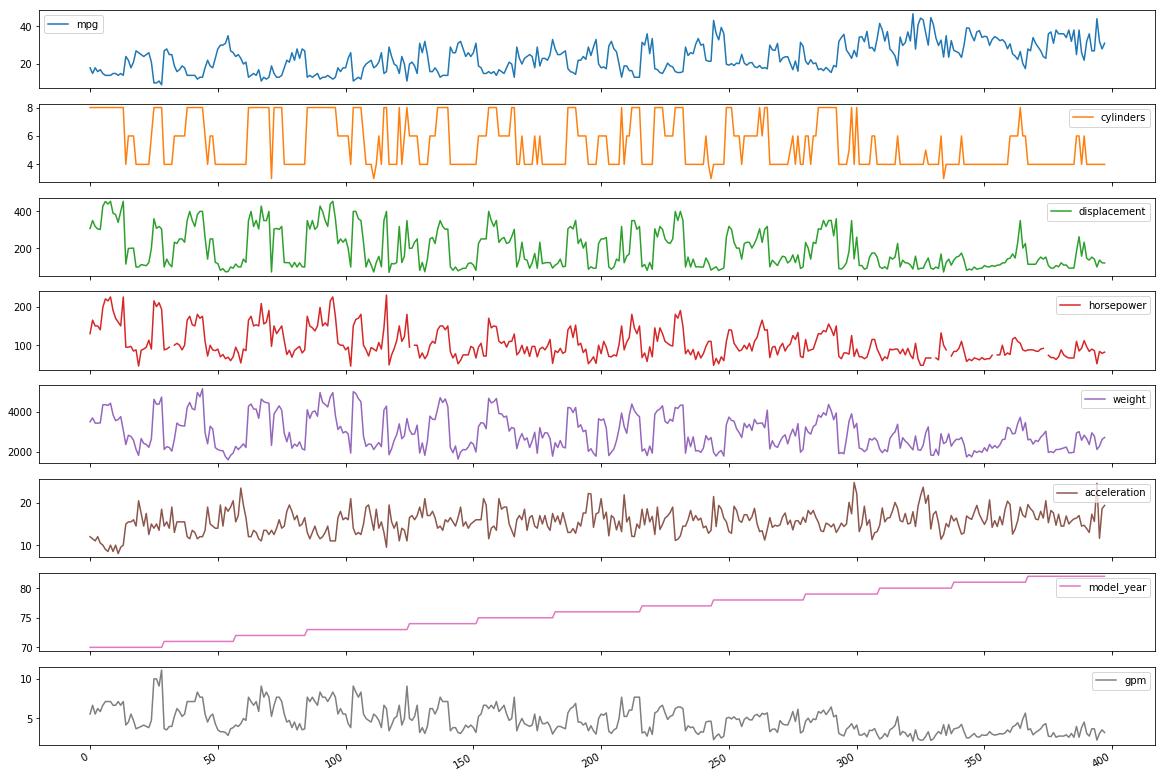

In [62]:
cars.plot(figsize=(20,15),subplots=True)

In [63]:
cars['weight_category'] = pd.qcut(cars.weight,[0,.25,.75,1],precision=2,
                                  labels=['light','medium','heavy'])
cars.weight_category.value_counts()

medium    198
heavy     100
light     100
Name: weight_category, dtype: int64

In [64]:
cars.drop(['cylinders','displacement','weight','acceleration','name','mpg'],axis=1,inplace=True)

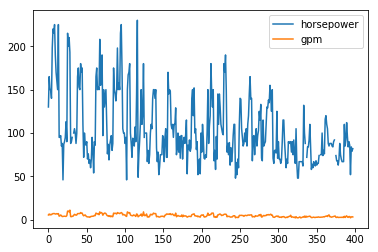

In [65]:
cars.loc[:,['horsepower','gpm']].plot()

In [66]:
cars['horsepower_z']= round((cars.horsepower - cars.horsepower.mean())/cars.horsepower.std(),2)

In [67]:
cars['gpm']=round((cars.gpm-cars.gpm.mean())/cars.gpm.std(),2)

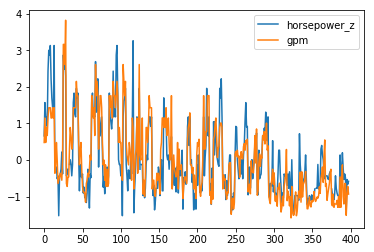

In [68]:
cars.loc[:,['horsepower_z','gpm']].plot()

In [79]:
cars=pd.get_dummies(cars,drop_first=True,columns=['model_year','origin'])

In [80]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
horsepower         392 non-null float64
gpm                398 non-null float64
manufacturer       398 non-null object
continent          398 non-null object
weight_category    398 non-null category
horsepower_z       392 non-null float64
model_year_1971    398 non-null uint8
model_year_1972    398 non-null uint8
model_year_1973    398 non-null uint8
model_year_1974    398 non-null uint8
model_year_1975    398 non-null uint8
model_year_1976    398 non-null uint8
model_year_1977    398 non-null uint8
model_year_1978    398 non-null uint8
model_year_1979    398 non-null uint8
model_year_1980    398 non-null uint8
model_year_1981    398 non-null uint8
model_year_1982    398 non-null uint8
origin_japan       398 non-null uint8
origin_usa         398 non-null uint8
dtypes: category(1), float64(3), object(2), uint8(14)
memory usage: 21.6+ KB


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True